In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import Ridge,LogisticRegression

In [3]:
df = pd.read_csv(r"/content/kidney_disease_extended_2000.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,1,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.replace('?',np.nan,inplace=True)
df.replace('\t?',np.nan,inplace=True)
df['cad'].replace('\tno','no',inplace=True)
df['appet'].replace('no','poor',inplace=True)
df['dm'].replace('\tno','no',inplace=True)
df['dm'].replace(['\tyes',' yes'],'yes',inplace=True)
df['pe'].replace('good','yes',inplace=True)
df.replace('ckd\t',"ckd",inplace=True)

<ipython-input-4-ea1aedcee014>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cad'].replace('\tno','no',inplace=True)
<ipython-input-4-ea1aedcee014>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [5]:
for col in df.columns:
  if(df[col].dtypes == "object"):
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
  else:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
df.isnull().sum()

<ipython-input-5-aa83d16733fd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
<ipython-input-5-aa83d16733fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [6]:
for col in df.columns:
  if(df[col].dtypes == "object"):
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
  else:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
df.isnull().sum()

<ipython-input-6-aa83d16733fd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
<ipython-input-6-aa83d16733fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [7]:
#encoding categorial values
label1=LabelEncoder()
df['rbc']=label1.fit_transform(df['rbc'])
label2=LabelEncoder()
df['pc']=label2.fit_transform(df['pc'])
label3=LabelEncoder()
df['pcc']=label3.fit_transform(df['pcc'])
label4=LabelEncoder()
df['ba']=label4.fit_transform(df['ba'])
label5=LabelEncoder()
df['htn']=label5.fit_transform(df['htn'])
label6=LabelEncoder()
df['dm']=label6.fit_transform(df['dm'])
label7=LabelEncoder()
df['cad']=label7.fit_transform(df['cad'])
label8=LabelEncoder()
df['appet']=label8.fit_transform(df['appet'])
label9=LabelEncoder()
df['pe']=label9.fit_transform(df['pe'])
label10=LabelEncoder()
df['ane']=label10.fit_transform(df['ane'])
label11=LabelEncoder()
df['classification']=label11.fit_transform(df['classification'])

In [8]:
#x is # x is input features
# y is target attribute
df_copy = df.copy()
x=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [9]:
#scaling the dataset
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
df=pd.DataFrame(scaled_data,columns=x.columns)
#binarizing the dataset
binary=Binarizer(threshold=(0.0))
df=binary.fit_transform(scaled_data)
df=pd.DataFrame(df,columns=x.columns)

In [10]:
df.head(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [11]:
x.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [13]:
#LSVM L2

# Initialize and train the LSVM model
clf = LinearSVC(penalty='l2',dual=False,C=0.6,max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       618
           1       0.97      0.98      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [14]:
#LSVM L1

# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.5,max_iter=13)
clf.fit(X_train, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.967
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       618
           1       0.92      1.00      0.96       382

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Initialize and train the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors (k) to 4
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.798
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       618
           1       0.69      0.86      0.77       382

    accuracy                           0.80      1000
   macro avg       0.79      0.81      0.79      1000
weighted avg       0.82      0.80      0.80      1000



In [16]:
#CHAID
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4)
clf.fit(X_train, y_train)

# Predictions on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       618
           1       1.00      0.95      0.98       382

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [17]:
#C5.O
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=2, max_leaf_nodes=7)
model.fit(X_train,y_train)
# Predicting on test data
preds = model.predict(X_test) # predicting on test data set
# Result Evaluation
print("\nAccuracy:",accuracy_score(y_test,preds))
print("Classicfication report:\n",classification_report(y_test,preds))

#print("Confusion Matrix:\n",confusion_matrix(y_test,preds))




Accuracy: 0.976
Classicfication report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       618
           1       0.98      0.95      0.97       382

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



In [18]:
#randomtree
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=2,criterion='gini',random_state=2)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       618
           1       1.00      0.95      0.98       382

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [19]:
#logistic regression

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=7000,C=0.7,solver='saga')  # max_iter is set to 1000 to avoid convergence warnings
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.856
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       618
           1       0.82      0.80      0.81       382

    accuracy                           0.86      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.86      0.86      0.86      1000



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the improved ANN model
model = MLPClassifier(hidden_layer_sizes=(512, 256,128, 128, 64),  # More neurons per layer
                      activation='relu',
                      solver='adam',
                      learning_rate_init=0.001,  # Adjusted learning rate
                      alpha=0.0001,  # Regularization to prevent overfitting
                      max_iter=3000,  # More iterations for convergence
                      batch_size=16,  # Smaller batch size for better updates
                      random_state=42)

model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))


Accuracy: 0.783
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       618
           1       0.64      1.00      0.78       382

    accuracy                           0.78      1000
   macro avg       0.82      0.82      0.78      1000
weighted avg       0.86      0.78      0.78      1000



In [21]:
# Naïve Bayes
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.962
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       618
           1       0.91      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [22]:
 #Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
model = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=15,min_samples_leaf=10, random_state=2)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       618
           1       0.98      0.95      0.97       382

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.97      1000



In [ ]:
#!pip uninstall -y imbalanced-learn
#!pip install --no-cache-dir -U imbalanced-learn


In [23]:
#smote with full features
from imblearn.over_sampling import (SMOTE)
sampler = SMOTE()
X1_train, y1_train = sampler.fit_resample(X_train, y_train)

In [24]:
#LSVM L2
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l2',C=0.2,dual=False,max_iter=100,tol=0.00001,random_state=10)
clf.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.984
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       618
           1       0.97      0.99      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [25]:
#LSVM L1
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.2,max_iter=7000)
clf.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.987
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       618
           1       0.97      0.99      0.98       382

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [26]:
#KNN
model = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors (k) to 5
model.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
print(classification_report(y_test, predictions))

Accuracy: 0.801
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       618
           1       0.67      0.94      0.78       382

    accuracy                           0.80      1000
   macro avg       0.81      0.83      0.80      1000
weighted avg       0.84      0.80      0.80      1000



In [27]:
#CHAID
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)
clf.fit(X1_train, y1_train)

# Predictions on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       618
           1       1.00      0.98      0.99       382

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [28]:
#C5.O
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, max_leaf_nodes=7)
model.fit(X1_train,y1_train)
# Predicting on test data
preds = model.predict(X_test) # predicting on test data set
# Result Evaluation
print("Classicfication report:\n",classification_report(y_test,preds))

print("\nAccuracy:",accuracy_score(y_test,preds))

Classicfication report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       618
           1       1.00      0.94      0.97       382

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Accuracy: 0.977


In [29]:
#RandomTree
model = RandomForestClassifier(n_estimators=1, random_state=2)
model.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       618
           1       0.97      0.98      0.97       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [30]:
#logistic
model = LogisticRegression(max_iter=70)
model.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       618
           1       0.82      0.86      0.84       382

    accuracy                           0.88      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.88      0.88      1000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#ann
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the improved ANN model
model = MLPClassifier(hidden_layer_sizes=(512, 256,128, 128, 64),  # More neurons per layer
                      activation='relu',
                      solver='adam',
                      learning_rate_init=0.001,  # Adjusted learning rate
                      alpha=0.0001,  # Regularization to prevent overfitting
                      max_iter=3000,  # More iterations for convergence
                      batch_size=16,  # Smaller batch size for better updates
                      random_state=42)

model.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))


Accuracy: 0.969
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       618
           1       0.96      0.96      0.96       382

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naïve Bayes classifier
model = GaussianNB()
model.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))


Accuracy: 0.962
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       618
           1       0.91      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(max_depth=3, random_state=2)  # You can adjust max_depth to control overfitting
model.fit(X1_train, y1_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))


Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       618
           1       1.00      0.95      0.98       382

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#!pip install mlxtend


In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Ensure X_train is a DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Initialize Sequential Feature Selector
sfs = SFS(RandomForestClassifier(n_estimators=5, random_state=42),
          k_features=10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Fit the selector to the training data
sfs.fit(X_train, y_train)

# Get selected feature indices (convert to list)
selected_feature_indices = list(sfs.k_feature_idx_)

# Select columns using indices
X_train3 = X_train.iloc[:, selected_feature_indices]
X_test3 = X_test.iloc[:, selected_feature_indices]

print("Selected Features:", X_train.columns[selected_feature_indices].tolist())



[2025-04-17 22:32:49] Features: 1/10 -- score: 0.991
[2025-04-17 22:32:50] Features: 2/10 -- score: 0.9930000000000001
[2025-04-17 22:32:52] Features: 3/10 -- score: 0.9970000000000001
[2025-04-17 22:32:53] Features: 4/10 -- score: 0.998
[2025-04-17 22:32:54] Features: 5/10 -- score: 1.0
[2025-04-17 22:32:56] Features: 6/10 -- score: 1.0
[2025-04-17 22:32:58] Features: 7/10 -- score: 1.0
[2025-04-17 22:33:00] Features: 8/10 -- score: 1.0
[2025-04-17 22:33:01] Features: 9/10 -- score: 1.0

Selected Features: [0, 3, 4, 5, 7, 8, 9, 19, 21, 23]



[2025-04-17 22:33:02] Features: 10/10 -- score: 0.999

In [35]:
#LSVM L2
clf = LinearSVC(penalty='l2',dual=False,C=0.5)
clf.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.916
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       618
           1       0.82      1.00      0.90       382

    accuracy                           0.92      1000
   macro avg       0.91      0.93      0.91      1000
weighted avg       0.93      0.92      0.92      1000



In [36]:
#LSVM L1
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.5)
clf.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.916
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       618
           1       0.82      1.00      0.90       382

    accuracy                           0.92      1000
   macro avg       0.91      0.93      0.91      1000
weighted avg       0.93      0.92      0.92      1000



In [37]:
#knn
model = KNeighborsClassifier(n_neighbors=5,leaf_size=5,p=1000)
model.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       618
           1       1.00      0.28      0.44       382

    accuracy                           0.72      1000
   macro avg       0.85      0.64      0.63      1000
weighted avg       0.81      0.72      0.67      1000



In [38]:
#CHAID
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=8)
clf.fit(X_train3, y_train)

# Predictions on test set
y_pred = clf.predict(X_test3)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       618
           1       0.97      0.98      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [39]:
#C5.O
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, max_leaf_nodes=7)
model.fit(X_train3,y_train)
# Predicting on test data
preds = model.predict(X_test3) # predicting on test data set
# Result Evaluation
print("\nAccuracy:",accuracy_score(y_test,preds))
print("Classicfication report:\n",classification_report(y_test,preds))


Accuracy: 0.964
Classicfication report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       618
           1       0.91      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [40]:
#RandomTree
model = RandomForestClassifier(n_estimators=30,   # Reduce number of trees
                               max_depth=6,       # Reduce depth for less overfitting
                               min_samples_split=5,  # Increase samples required for a split
                               min_samples_leaf=3,   # Increase min leaf size to generalize better
                               random_state=42)
model.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.969
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       618
           1       0.92      1.00      0.96       382

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [41]:
#logistic
model = LogisticRegression(max_iter=1000)
model.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.916
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       618
           1       0.82      1.00      0.90       382

    accuracy                           0.92      1000
   macro avg       0.91      0.93      0.91      1000
weighted avg       0.93      0.92      0.92      1000



In [42]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the ANN model
clf = MLPClassifier(hidden_layer_sizes=( 512,256, 128, 64),  # Three hidden layers
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,  # Regularization to prevent overfitting
                    max_iter=1000,  # More iterations for convergence
                    random_state=42)

clf.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.819
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       618
           1       0.76      0.78      0.77       382

    accuracy                           0.82      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000



In [43]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
clf = GaussianNB()
clf.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.916
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       618
           1       0.82      1.00      0.90       382

    accuracy                           0.92      1000
   macro avg       0.91      0.93      0.91      1000
weighted avg       0.93      0.92      0.92      1000



In [44]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train3, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.969
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       618
           1       0.92      1.00      0.96       382

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [45]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Ensure X_train is a DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Initialize Sequential Feature Selector for Backward Selection
sfs = SFS(RandomForestClassifier(n_estimators=5, random_state=42),
          k_features=10,  # Select top 10 features
          forward=False,  # Set to False for Backward Elimination
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Fit the selector to the training data
sfs.fit(X_train, y_train)

# Get selected feature indices (convert to list)
selected_feature_indices = list(sfs.k_feature_idx_)

# Select columns using indices
X_train4 = X_train.iloc[:, selected_feature_indices]
X_test4 = X_test.iloc[:, selected_feature_indices]

print("Selected Features:", X_train.columns[selected_feature_indices].tolist())



[2025-04-17 22:33:26] Features: 24/10 -- score: 1.0
[2025-04-17 22:33:28] Features: 23/10 -- score: 1.0
[2025-04-17 22:33:29] Features: 22/10 -- score: 1.0
[2025-04-17 22:33:31] Features: 21/10 -- score: 0.999
[2025-04-17 22:33:33] Features: 20/10 -- score: 1.0
[2025-04-17 22:33:35] Features: 19/10 -- score: 1.0
[2025-04-17 22:33:36] Features: 18/10 -- score: 1.0
[2025-04-17 22:33:37] Features: 17/10 -- score: 0.999
[2025-04-17 22:33:38] Features: 16/10 -- score: 0.999
[2025-04-17 22:33:39] Features: 15/10 -- score: 0.999
[2025-04-17 22:33:40] Features: 14/10 -- score: 0.999
[2025-04-17 22:33:41] Features: 13/10 -- score: 0.999
[2025-04-17 22:33:42] Features: 12/10 -- score: 0.999
[2025-04-17 22:33:43] Features: 11/10 -- score: 0.999

Selected Features: [3, 4, 6, 8, 10, 11, 16, 21, 22, 23]



[2025-04-17 22:33:43] Features: 10/10 -- score: 1.0

In [46]:
#LSVM L2
clf = LinearSVC(penalty='l2',dual=False,C=0.5)
clf.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.963
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       618
           1       0.91      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [47]:
#LSVM L1
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.5)
clf.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.965
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       618
           1       0.92      0.99      0.96       382

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
#knn
model = KNeighborsClassifier(n_neighbors=5,leaf_size=5,p=1000)
model.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.821
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       618
           1       0.91      0.59      0.72       382

    accuracy                           0.82      1000
   macro avg       0.85      0.78      0.79      1000
weighted avg       0.84      0.82      0.81      1000



In [49]:
#CHAID
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=8)
clf.fit(X_train4, y_train)

# Predictions on test set
y_pred = clf.predict(X_test4)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       618
           1       0.97      0.96      0.97       382

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [50]:
#C5.O
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, max_leaf_nodes=7)
model.fit(X_train4,y_train)
# Predicting on test data
preds = model.predict(X_test4) # predicting on test data set
# Result Evaluation
print("\nAccuracy:",accuracy_score(y_test,preds))
print("Classicfication report:\n",classification_report(y_test,preds))


Accuracy: 0.956
Classicfication report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       618
           1       0.90      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.96      0.96      0.96      1000



In [51]:
#RandomTree
model = RandomForestClassifier(n_estimators=30,   # Reduce number of trees
                               max_depth=6,       # Reduce depth for less overfitting
                               min_samples_split=5,  # Increase samples required for a split
                               min_samples_leaf=3,   # Increase min leaf size to generalize better
                               random_state=42)
model.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.989
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       618
           1       0.97      1.00      0.99       382

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [52]:
#logistic
model = LogisticRegression(max_iter=1000)
model.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.963
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       618
           1       0.93      0.97      0.95       382

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [53]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the ANN model
clf = MLPClassifier(hidden_layer_sizes=( 512,256, 128, 64),  # Three hidden layers
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,  # Regularization to prevent overfitting
                    max_iter=1000,  # More iterations for convergence
                    random_state=42)

clf.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.904
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       618
           1       0.80      1.00      0.89       382

    accuracy                           0.90      1000
   macro avg       0.90      0.92      0.90      1000
weighted avg       0.92      0.90      0.91      1000



In [54]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
clf = GaussianNB()
clf.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.889
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       618
           1       0.77      1.00      0.87       382

    accuracy                           0.89      1000
   macro avg       0.89      0.91      0.89      1000
weighted avg       0.91      0.89      0.89      1000



In [55]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       618
           1       0.98      0.94      0.96       382

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [56]:
clf = LinearSVC(penalty='l1', dual=False, C=1, max_iter=8000, random_state=42)
clf.fit(X_train, y_train)

# Identify and drop unimportant features
selected_features = X_train.columns[clf.coef_[0] != 0]
X_train5 = X_train[selected_features]
X_test5 = X_test[selected_features]

print(X_test5.columns)

Index([0, 1, 2, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23,
       24],
      dtype='int64')


In [57]:
#LSVM L2
clf = LinearSVC(penalty='l2',dual=False,C=0.5)
clf.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.983
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       618
           1       0.97      0.98      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [58]:
#LSVM L1
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.5, max_iter=8000)
clf.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.988
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       618
           1       0.99      0.98      0.98       382

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [59]:
#knn
model = KNeighborsClassifier(n_neighbors=5,leaf_size=5,p=1000)
model.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.618
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       618
           1       0.00      0.00      0.00       382

    accuracy                           0.62      1000
   macro avg       0.31      0.50      0.38      1000
weighted avg       0.38      0.62      0.47      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
#CHAID
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=8)
clf.fit(X_train5, y_train)

# Predictions on test set
y_pred = clf.predict(X_test5)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       618
           1       1.00      0.95      0.98       382

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [61]:
#C5.O
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, max_leaf_nodes=7)
model.fit(X_train5,y_train)
# Predicting on test data
preds = model.predict(X_test5) # predicting on test data set
# Result Evaluation
print("\nAccuracy:",accuracy_score(y_test,preds))
print("Classicfication report:\n",classification_report(y_test,preds))


Accuracy: 0.976
Classicfication report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       618
           1       0.98      0.95      0.97       382

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



In [62]:
#RandomTree
model = RandomForestClassifier(n_estimators=30,   # Reduce number of trees
                               max_depth=6,       # Reduce depth for less overfitting
                               min_samples_split=5,  # Increase samples required for a split
                               min_samples_leaf=3,   # Increase min leaf size to generalize better
                               random_state=42)
model.fit(X_train4, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.989
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       618
           1       0.97      1.00      0.99       382

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [63]:
#logistic
model = LogisticRegression(max_iter=10000)
model.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       618
           1       0.97      0.98      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128,64),  # More neurons per layer
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,  # Keep L2 regularization
                    batch_size=32,  # Mini-batch training
                    learning_rate='adaptive',  # Adjusts learning rate dynamically
                    max_iter=2000,  # Increase iterations for convergence
                    random_state=42)


clf.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.821
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       618
           1       0.93      0.58      0.71       382

    accuracy                           0.82      1000
   macro avg       0.86      0.77      0.79      1000
weighted avg       0.84      0.82      0.81      1000



In [65]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
clf = GaussianNB()
clf.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.959
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       618
           1       0.90      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [66]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train5, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.986
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       618
           1       0.99      0.97      0.98       382

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [67]:
smote = SMOTE(random_state=42)
X_train6, y_train6 = smote.fit_resample(X_train5, y_train)

In [68]:
#LSVM L2
clf = LinearSVC(penalty='l2',dual=False,C=0.5)
clf.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       618
           1       0.97      0.99      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [69]:
#LSVM L1
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.1,tol=0.0001)
clf.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test, predictions))

Accuracy: 0.981
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       618
           1       0.96      0.99      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [70]:
#knn
model = KNeighborsClassifier(n_neighbors=5,leaf_size=5,p=999999)
model.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = model.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.618
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       618
           1       0.00      0.00      0.00       382

    accuracy                           0.62      1000
   macro avg       0.31      0.50      0.38      1000
weighted avg       0.38      0.62      0.47      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
#CHAID
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=4)
clf.fit(X_train6, y_train6)

# Predictions on test set
y_pred = clf.predict(X_test5)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       618
           1       1.00      0.96      0.98       382

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [72]:
#C5.O
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=2, max_leaf_nodes=7)
model.fit(X_train6,y_train6)
# Predicting on test data
preds = model.predict(X_test5) # predicting on test data set
# Result Evaluation
print("\nAccuracy:",accuracy_score(y_test,preds))
print("Classicfication report:\n",classification_report(y_test,preds))


Accuracy: 0.953
Classicfication report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       618
           1       0.92      0.96      0.94       382

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [73]:
#RandomTree
model = RandomForestClassifier(n_estimators=1, random_state=0,max_depth=2)
model.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = model.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.834
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       618
           1       0.70      1.00      0.82       382

    accuracy                           0.83      1000
   macro avg       0.85      0.87      0.83      1000
weighted avg       0.88      0.83      0.84      1000



In [74]:
#logistic
model = LogisticRegression(max_iter=8000)
model.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = model.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       618
           1       0.97      0.99      0.98       382

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128,64),  # More neurons per layer
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,  # Keep L2 regularization
                    batch_size=32,  # Mini-batch training
                    learning_rate='adaptive',  # Adjusts learning rate dynamically
                    max_iter=2000,  # Increase iterations for convergence
                    random_state=42)


clf.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.904
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       618
           1       0.98      0.76      0.86       382

    accuracy                           0.90      1000
   macro avg       0.93      0.88      0.89      1000
weighted avg       0.91      0.90      0.90      1000



In [76]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
clf = GaussianNB()
clf.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.963
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       618
           1       0.91      1.00      0.95       382

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [77]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train6, y_train6)

# Make predictions on the testing set
predictions = clf.predict(X_test5)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.983
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       618
           1       0.99      0.96      0.98       382

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv(r"/content/kidney_disease_extended_2000.csv").dropna()

# Convert categorical columns to numerical
df = pd.get_dummies(df, columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

# Convert classification to binary (0 = notckd, 1 = ckd)
df["classification"] = df["classification"].map({"ckd": 1, "notckd": 0})

# Select only 'notckd' samples
notckd_data = df[df["classification"] == 0].drop(columns=["classification"])

# Normalize numerical features
scaler = MinMaxScaler(feature_range=(-1, 1))
notckd_data_scaled = scaler.fit_transform(notckd_data)

# Define input dimensions
latent_dim = 20  # Noise vector size
input_dim = notckd_data.shape[1]  # Feature count

# Build the Generator
def build_generator():
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_dim=latent_dim),
        layers.Dense(256, activation="relu"),
        layers.Dense(input_dim, activation="tanh")  # Output matches real data range
    ])
    return model

# Build the Discriminator
def build_discriminator():
    model = keras.Sequential([
        layers.Dense(256, activation="relu", input_dim=input_dim),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid")  # Output probability (real or fake)
    ])
    return model

# Initialize models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=keras.optimizers.Adam(0.0002), loss="binary_crossentropy", metrics=["accuracy"])

discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(optimizer=keras.optimizers.Adam(0.0002), loss="binary_crossentropy")

# Training the GAN
batch_size = 32
epochs = 500

def train_gan():
    for epoch in range(epochs):
        idx = np.random.randint(0, notckd_data_scaled.shape[0], batch_size)
        real_samples = notckd_data_scaled[idx]
        real_labels = np.ones((batch_size, 1))

        z = np.random.randn(batch_size, latent_dim)
        fake_samples = generator.predict(z)
        fake_labels = np.zeros((batch_size, 1))

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        z = np.random.randn(batch_size, latent_dim)
        g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs} - D Loss: {d_loss[0]:.4f}, G Loss: {g_loss:.4f}")

train_gan()

# Generate synthetic samples
num_synthetic_samples = 500
z = np.random.randn(num_synthetic_samples, latent_dim)
synthetic_samples = generator.predict(z)
synthetic_samples = scaler.inverse_transform(synthetic_samples)

# Save synthetic data
synthetic_df = pd.DataFrame(synthetic_samples, columns=notckd_data.columns)
synthetic_df['classification'] = 0  # Label as 'notckd'
synthetic_df.to_csv("synthetic_notckd_data_tf.csv", index=False)

print("Synthetic data saved as synthetic_notckd_data_tf.csv!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [79]:
# Load original data
df = pd.read_csv(r"/content/kidney_disease_extended_2000.csv")
df["classification"] = df["classification"].str.strip()  # Clean up classification column

# Load synthetic data
synthetic_df = pd.read_csv("/content/synthetic_notckd_data_tf.csv")

# Combine datasets
combined_df = pd.concat([df, synthetic_df], ignore_index=True)

# Save combined dataset
combined_df.to_csv("combined_kidney_data.csv", index=False)
print("Combined dataset saved as combined_kidney_data.csv!")


Combined dataset saved as combined_kidney_data.csv!


In [80]:
import pandas as pd

# Load the dataset
combined_df = pd.read_csv("/content/combined_kidney_data.csv")

# Display basic information
print(combined_df.info())
print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2500 non-null   float64
 1   age             2500 non-null   float64
 2   bp              2500 non-null   float64
 3   sg              2500 non-null   float64
 4   al              2500 non-null   float64
 5   su              2500 non-null   float64
 6   rbc             1240 non-null   object 
 7   pc              1675 non-null   object 
 8   pcc             1980 non-null   object 
 9   ba              1980 non-null   object 
 10  bgr             2500 non-null   float64
 11  bu              2500 non-null   float64
 12  sc              2500 non-null   float64
 13  sod             2500 non-null   float64
 14  pot             2500 non-null   float64
 15  hemo            2240 non-null   float64
 16  pcv             2150 non-null   object 
 17  wc              1975 non-null   o

In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load combined dataset
combined_df = pd.read_csv("/content/cleaned_combined_kidney_data.csv")

# 1. Clean problematic values
combined_df = combined_df.replace(r'\\t\?', pd.NA, regex=True)  # Handle tab+question mark
combined_df = combined_df.replace('?', pd.NA)  # Regular question marks

# 2. Fix classification column
combined_df["classification"] = combined_df["classification"].str.strip()

categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in categorical_columns:
    label_encoder = LabelEncoder()
    combined_df[col] = label_encoder.fit_transform(combined_df[col])

# 4. Convert all features to numeric (ignore errors)
numeric_cols = combined_df.columns.drop('classification')
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 5. Impute missing values
imputer = SimpleImputer(strategy='median')  # Use mean/median for numerical
combined_df[numeric_cols] = imputer.fit_transform(combined_df[numeric_cols])

# 6. Split features and labels
X = combined_df.drop("classification", axis=1)
y = combined_df["classification"]

# 7. Normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

print("Data prepared successfully!")



Data prepared successfully!


In [83]:
y.head()

,classification
0,1
1,1
2,1
3,1
4,1


In [84]:
#scaling the dataset
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
df=pd.DataFrame(scaled_data,columns=x.columns)
#binarizing the dataset
binary=Binarizer(threshold=(0.0))
df=binary.fit_transform(scaled_data)
df=pd.DataFrame(df,columns=x.columns)

In [85]:
from sklearn.model_selection import train_test_split

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X_scaled, y, test_size=0.7, random_state=42
)

In [86]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Adjust C value for stronger regularization
clf = LinearSVC(penalty='l2', dual=False, C=0.1)  # Lower C value
clf.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = clf.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test7, predictions))


Accuracy: 0.9937142857142857
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      0.99      0.99       881
           2       0.98      1.00      0.99       527

    accuracy                           0.99      1750
   macro avg       0.99      1.00      0.99      1750
weighted avg       0.99      0.99      0.99      1750



In [87]:
#LSVM L1
# Initialize and train the LSVM model
clf = LinearSVC(penalty='l1',dual=False,C=0.01,tol=0.0001)
clf.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = clf.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

#accuracy print
print(classification_report(y_test7, predictions))


Accuracy: 0.9811428571428571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      0.96      0.98       881
           2       0.94      1.00      0.97       527

    accuracy                           0.98      1750
   macro avg       0.98      0.99      0.98      1750
weighted avg       0.98      0.98      0.98      1750



In [88]:
#knn
model = KNeighborsClassifier(n_neighbors=5,leaf_size=5,p=999999)
model.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = model.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test7, predictions))

Accuracy: 0.9685714285714285
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       0.97      0.97      0.97       881
           2       0.94      0.95      0.95       527

    accuracy                           0.97      1750
   macro avg       0.97      0.97      0.97      1750
weighted avg       0.97      0.97      0.97      1750



In [89]:
#CHAID
clf = DecisionTreeClassifier(criterion='entropy', splitter='best',min_samples_leaf=8)
clf.fit(X_train7, y_train7)

# Predictions on test set
y_pred = clf.predict(X_test7)
accuracy = accuracy_score(y_test7, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test7, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       342
           1       0.98      0.97      0.98       881
           2       0.95      0.96      0.95       527

    accuracy                           0.97      1750
   macro avg       0.97      0.98      0.97      1750
weighted avg       0.97      0.97      0.97      1750



In [90]:
#C5.O
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, max_leaf_nodes=7)
model.fit(X_train7,y_train7)
# Predicting on test data
preds = model.predict(X_test7) # predicting on test data set
# Result Evaluation
print("\nAccuracy:",accuracy_score(y_test7,preds))
print("Classicfication report:\n",classification_report(y_test7,preds))


Accuracy: 0.9788571428571429
Classicfication report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       342
           1       0.98      0.98      0.98       881
           2       0.97      0.96      0.96       527

    accuracy                           0.98      1750
   macro avg       0.98      0.98      0.98      1750
weighted avg       0.98      0.98      0.98      1750



In [91]:
#RandomTree
model = RandomForestClassifier(n_estimators=1, random_state=0,max_depth=2)
model.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = model.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test7, predictions))

Accuracy: 0.9257142857142857
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       342
           1       0.96      0.90      0.93       881
           2       0.85      0.92      0.88       527

    accuracy                           0.93      1750
   macro avg       0.93      0.94      0.93      1750
weighted avg       0.93      0.93      0.93      1750



In [92]:
#logistic
model = LogisticRegression(max_iter=1000)
model.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = model.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test7, predictions))

Accuracy: 0.9954285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       0.99      1.00      1.00       881
           2       0.99      0.99      0.99       527

    accuracy                           1.00      1750
   macro avg       1.00      1.00      1.00      1750
weighted avg       1.00      1.00      1.00      1750



In [93]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the ANN model
clf = MLPClassifier(hidden_layer_sizes=( 512,256, 128, 64),  # Three hidden layers
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,  # Regularization to prevent overfitting
                    max_iter=1000,  # More iterations for convergence
                    random_state=42)

clf.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = clf.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test7, predictions))

Accuracy: 0.9971428571428571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       0.99      1.00      1.00       881
           2       1.00      0.99      1.00       527

    accuracy                           1.00      1750
   macro avg       1.00      1.00      1.00      1750
weighted avg       1.00      1.00      1.00      1750



In [94]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = clf.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test7, predictions))

Accuracy: 0.9868571428571429
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       342
           1       1.00      0.98      0.99       881
           2       0.97      0.99      0.98       527

    accuracy                           0.99      1750
   macro avg       0.98      0.99      0.99      1750
weighted avg       0.99      0.99      0.99      1750



In [95]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train7, y_train7)

# Make predictions on the testing set
predictions = clf.predict(X_test7)

# Calculate accuracy
accuracy = accuracy_score(y_test7, predictions)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test7, predictions))

Accuracy: 0.9868571428571429
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       342
           1       1.00      0.98      0.99       881
           2       0.97      0.99      0.98       527

    accuracy                           0.99      1750
   macro avg       0.98      0.99      0.99      1750
weighted avg       0.99      0.99      0.99      1750



In [96]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/kidney_disease_extended_2000.csv")

# Preprocess dataset
for col in df.columns:
    if df[col].dtype == "object":
        # Replace missing values with mode
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

        # Encode categorical variables
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Split features and labels
X = df.drop("classification", axis=1)
y = df["classification"]

# Use imputer to handle any remaining missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split dataset into training and testing sets
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Define models
ann_model = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64), activation='relu', solver='adam', max_iter=1000, random_state=42)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Create bagging ensemble for each model
bagging_ann = BaggingClassifier(estimator=ann_model, n_estimators=10, random_state=42)
bagging_logistic = BaggingClassifier(estimator=logistic_model, n_estimators=10, random_state=42)
bagging_dt = BaggingClassifier(estimator=decision_tree_model, n_estimators=10, random_state=42)

# Fit bagging models
bagging_ann.fit(X_train8, y_train8)
bagging_logistic.fit(X_train8, y_train8)
bagging_dt.fit(X_train8, y_train8)

# Make predictions
ann_pred = bagging_ann.predict(X_test8)
logistic_pred = bagging_logistic.predict(X_test8)
dt_pred = bagging_dt.predict(X_test8)

# Create voting ensemble model
voting_model = VotingClassifier(estimators=[
    ('ann', ann_model),
    ('logistic', logistic_model),
    ('dt', decision_tree_model)
], voting='soft')

# Fit voting model
voting_model.fit(X_train8, y_train8)

# Make predictions
voting_pred = voting_model.predict(X_test8)

# Evaluate model
accuracy = accuracy_score(y_test8, voting_pred)
report = classification_report(y_test8, voting_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.994
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       615
           1       1.00      0.67      0.80         3
           2       1.00      0.99      0.99       382

    accuracy                           0.99      1000
   macro avg       1.00      0.88      0.93      1000
weighted avg       0.99      0.99      0.99      1000



<ipython-input-97-044877876c79>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.values()), y=list(model_scores.keys()), palette='crest')


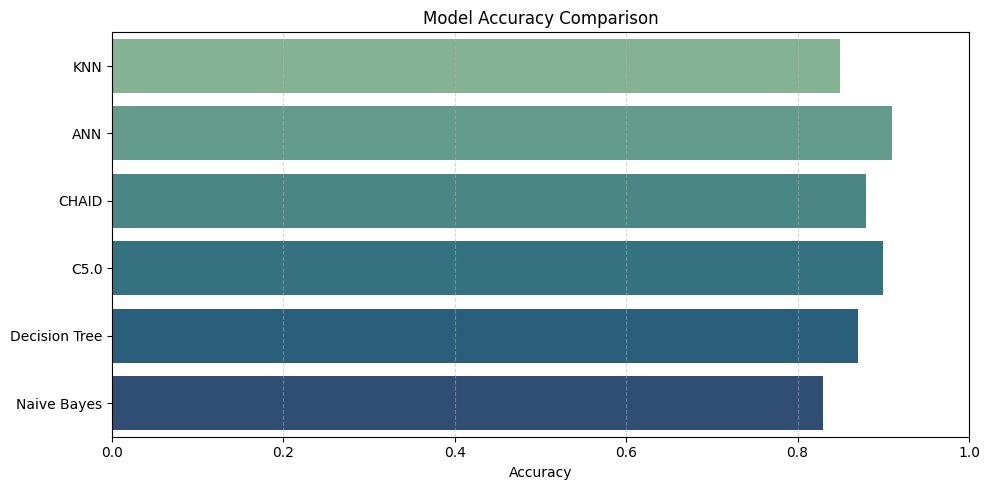

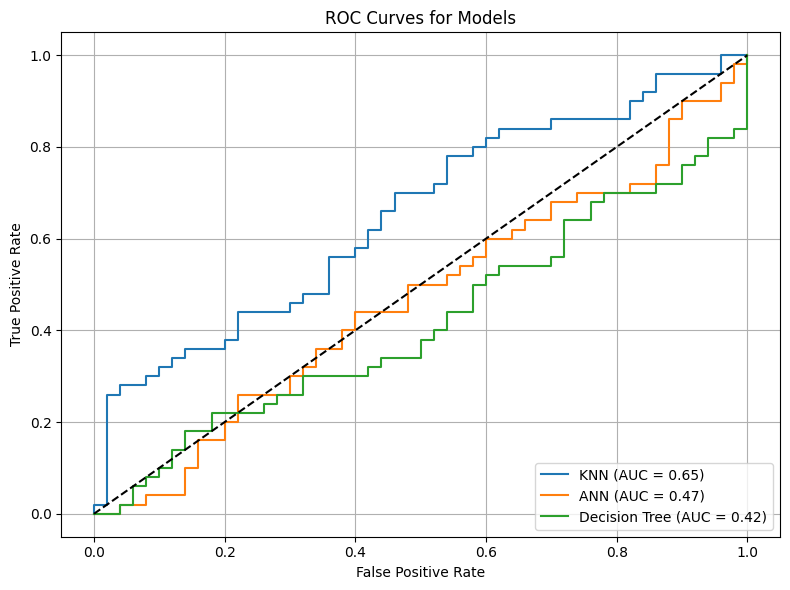

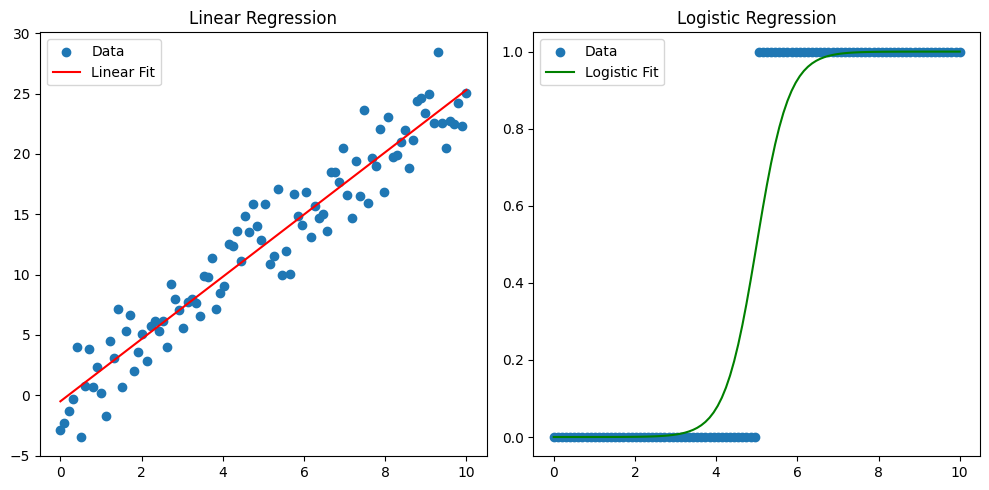

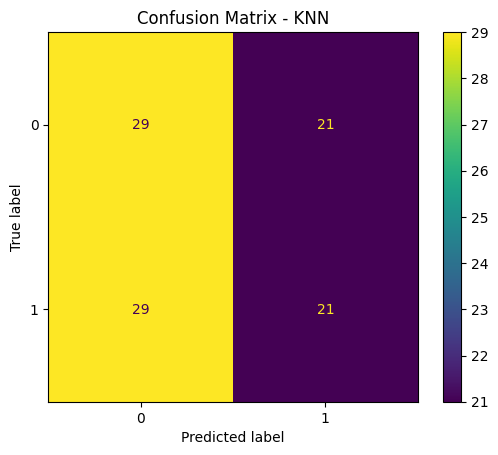

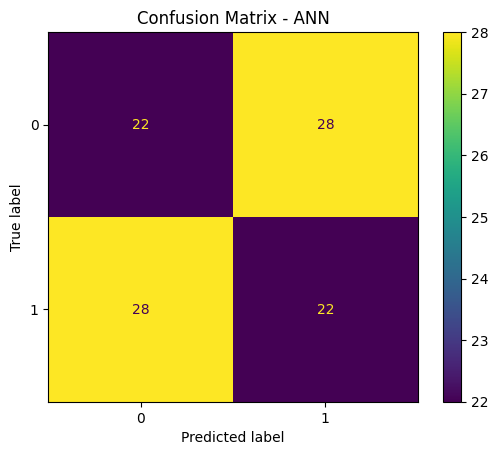

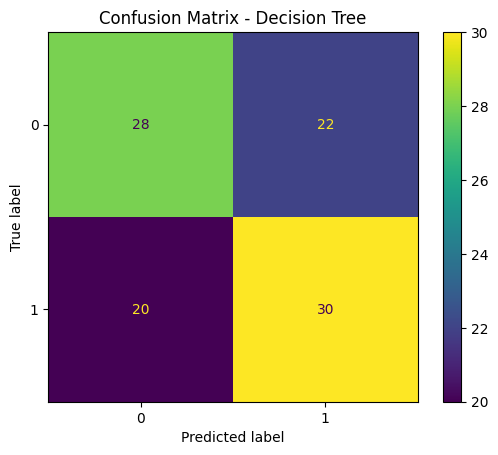

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression

# === 1. Bar Chart of Model Accuracy ===
model_scores = {
    'KNN': 0.85,
    'ANN': 0.91,
    'CHAID': 0.88,
    'C5.0': 0.90,
    'Decision Tree': 0.87,
    'Naive Bayes': 0.83
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_scores.values()), y=list(model_scores.keys()), palette='crest')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === 2. ROC Curves (Mock Example) ===
y_true = np.array([0, 0, 1, 1] * 25)
model_probs = {
    'KNN': np.random.uniform(0.1, 0.9, 100),
    'ANN': np.random.uniform(0.2, 0.95, 100),
    'Decision Tree': np.random.uniform(0.15, 0.85, 100),
}

plt.figure(figsize=(8, 6))
for model, y_score in model_probs.items():
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 3. Linear vs Logistic Regression ===
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_linear = 2.5 * X.flatten() + np.random.normal(0, 2, 100)
y_logistic = (X.flatten() > 5).astype(int)

lin_reg = LinearRegression().fit(X, y_linear)
y_pred_linear = lin_reg.predict(X)

log_reg = LogisticRegression().fit(X, y_logistic)
y_pred_logistic = log_reg.predict_proba(X)[:, 1]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y_linear, label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Fit')
plt.title('Linear Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y_logistic, label='Data')
plt.plot(X, y_pred_logistic, color='green', label='Logistic Fit')
plt.title('Logistic Regression')
plt.legend()

plt.tight_layout()
plt.show()

# === 4. Confusion Matrices (Mock Example) ===
for model in ['ANN', 'Decision Tree']:
    y_pred = np.random.choice([0, 1], size=100)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {model}')
    plt.show()
